In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('automobile.csv')
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [69]:
df = data.copy()

df.isnull().sum().sort_values(ascending = False).head()

normalized-losses    37
num-of-doors          2
symboling             0
engine-type           0
highway-mpg           0
dtype: int64

In [70]:
df.drop('normalized-losses', axis = 1, inplace = True)
df.dropna(inplace = True)
df.isnull().sum().sort_values(ascending = False).head()

symboling      0
engine-type    0
highway-mpg    0
city-mpg       0
peak-rpm       0
dtype: int64

In [71]:
cats = df.select_dtypes(exclude = 'number')
nums = df.select_dtypes(include = 'number')

print('Categorical Dataset')
display(cats.head())
print(f'\n\nNumerical Dataset')
display(nums.head())

Categorical Dataset


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500




Numerical Dataset


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450


In [72]:
# Ascertain whether to scale the numerical or not 
nums.describe()
# Obviously, standard deviation is low,
# so no need for standard scaling

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,0.835000,98.874000,174.340500,65.91150,53.782500,2560.58500,127.115000,10.11110,25.100000,30.605000,13289.525000
std,1.263231,6.114134,12.334908,2.11178,2.443624,519.10747,41.610684,3.91114,6.407439,6.796317,7985.878993
min,-2.000000,86.600000,141.100000,60.30000,47.800000,1488.00000,61.000000,7.00000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.17500,52.000000,2163.00000,97.750000,8.60000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.50000,54.100000,2417.00000,120.000000,9.00000,24.000000,30.000000,10320.000000
75%,2.000000,102.400000,183.775000,66.90000,55.525000,2939.25000,142.000000,9.40000,30.000000,34.000000,16506.000000
max,3.000000,120.900000,208.100000,72.00000,59.800000,4066.00000,326.000000,23.00000,49.000000,54.000000,45400.000000


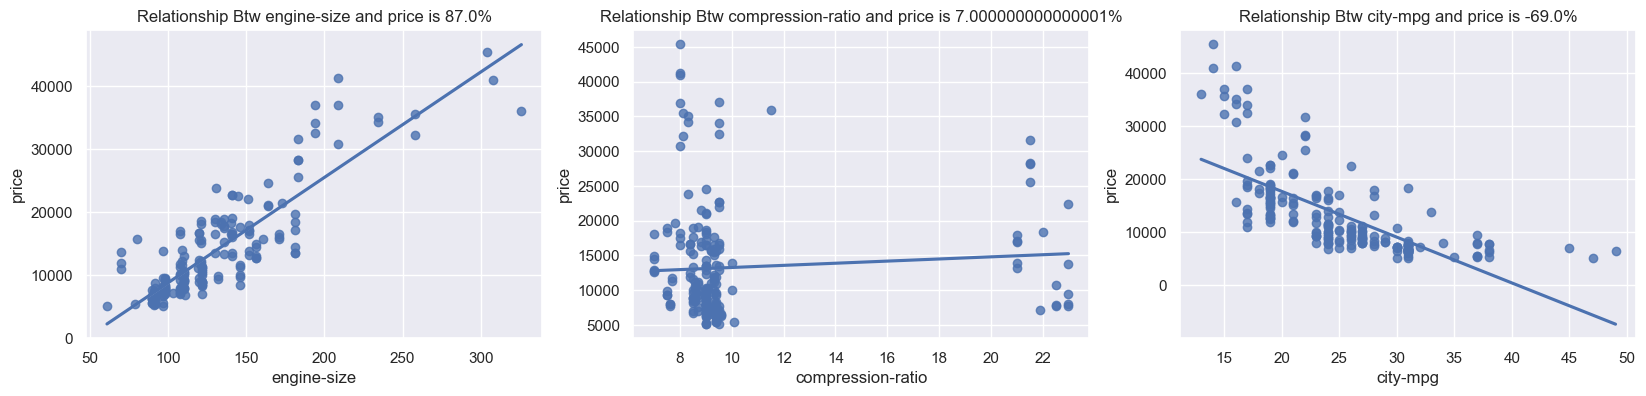

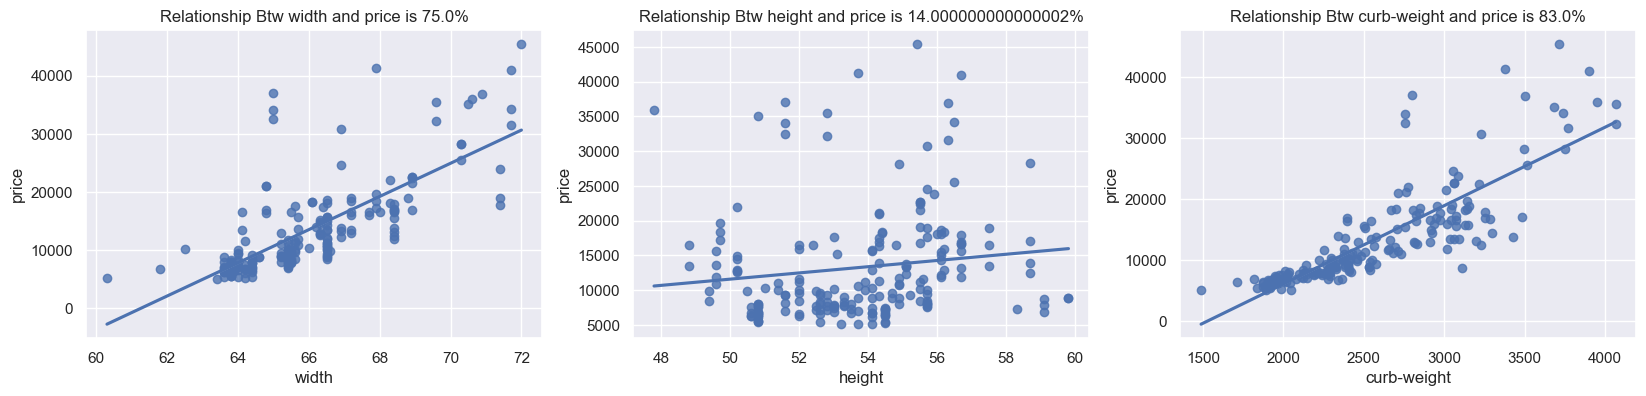

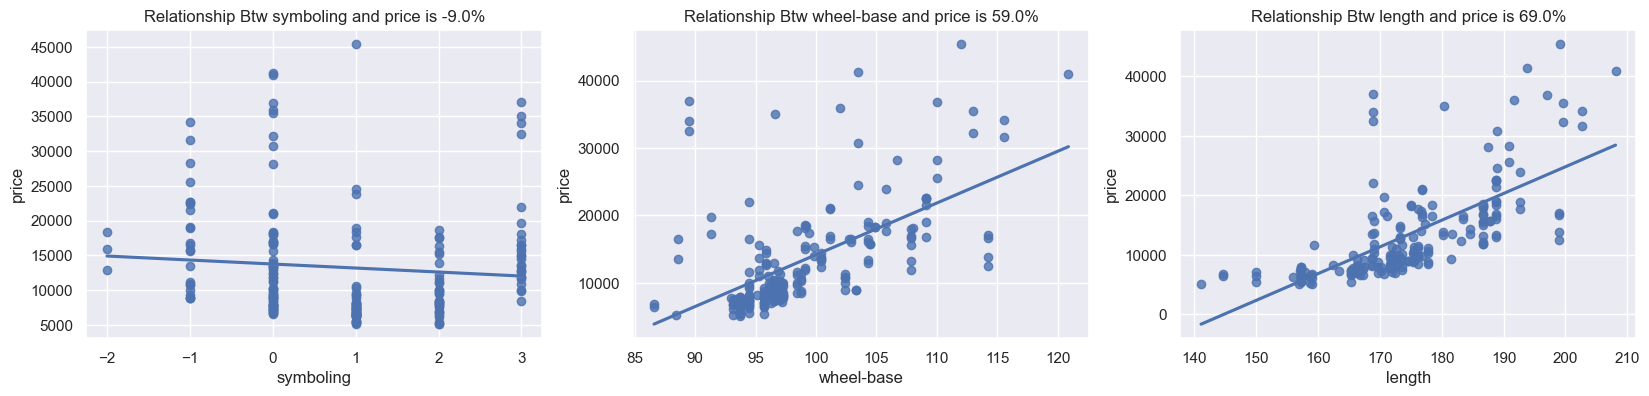

In [73]:
# Check For Linearity 
import matplotlib.pyplot as plt
def plotter(dataframe, col1, col2, col3, dependent):
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (20,4))

    plt.subplot(1,3,1)
    sns.regplot(x = dataframe[col1], y = dataframe[dependent], ci = 0)
    plt.title(f"Relationship Btw {col1} and {dependent} is {(dataframe[dependent].corr(dataframe[col1]).round(2)* 100)}%")

    plt.subplot(1,3,2)
    sns.regplot(x = dataframe[col2], y = dataframe[dependent], ci = 0)
    plt.title(f"Relationship Btw {col2} and {dependent} is {(dataframe[dependent].corr(dataframe[col2]).round(2)* 100)}%")

    plt.subplot(1,3,3)
    sns.regplot(x = dataframe[col3], y = dataframe[dependent], ci = 0)
    plt.title(f"Relationship Btw {col3} and {dependent} is {(dataframe[dependent].corr(dataframe[col3]).round(2)* 100)}%")


plotter(df, 'engine-size', 'compression-ratio', 'city-mpg', 'price')
plotter(df, 'width', 'height', 'curb-weight', 'price')
plotter(df, 'symboling', 'wheel-base', 'length', 'price')

Having Ascertained a good relationship between the numerical variables and the Dependent variables, <br>
then we can proceed to check for multi-colinearity

<Axes: >

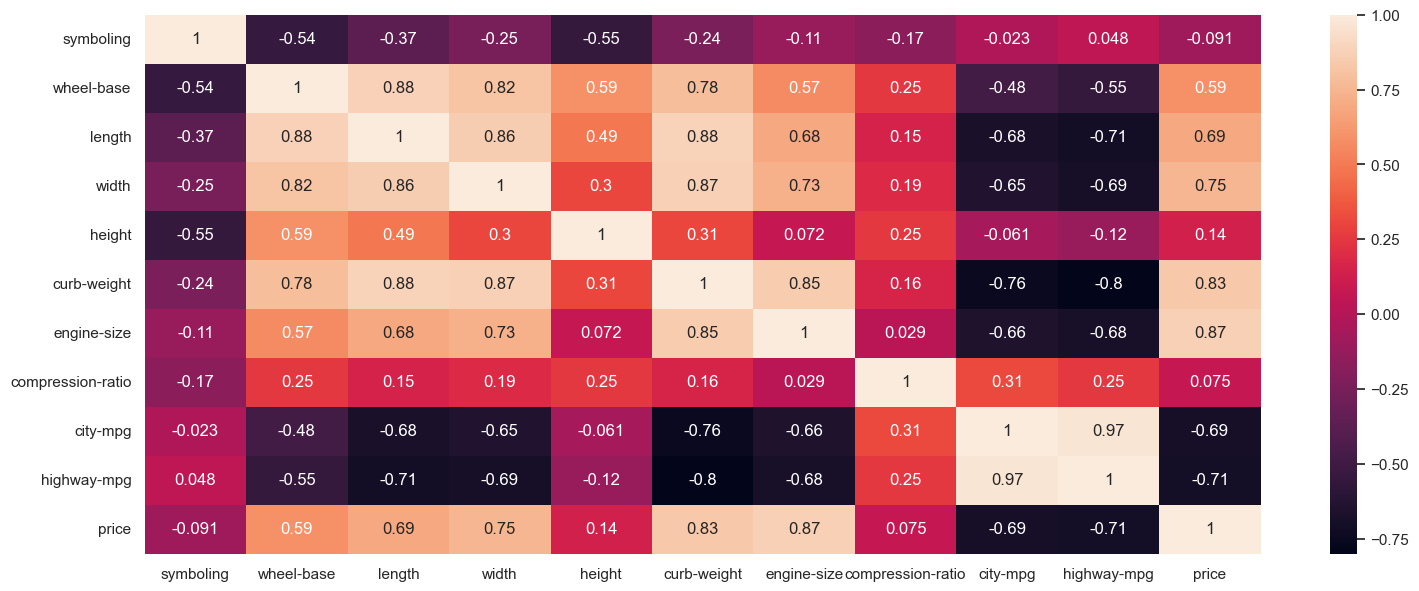

In [74]:
plt.figure(figsize = (18, 7))
sns.heatmap(nums.corr(), annot = True)

In [75]:
# We could identify some multi-colinearity(threshold of 80%) between compression-ratio and fuel type 
# This means we can only use one of the two columns in our modelling 

In [76]:
# Feature Engineering 
# Encode the categorical varaibles 
from sklearn.preprocessing import LabelEncoder
import joblib
import warnings
warnings.filterwarnings('ignore')

# Iterate through the categorical column and encode them each
for i in cats:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[[i]])
    joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,1,0,1,0,2,0,88.6,168.8,...,130,5,23,4,9.0,5,9,21,27,13495
1,3,0,1,0,1,0,2,0,88.6,168.8,...,130,5,23,4,9.0,5,9,21,27,16500
2,1,0,1,0,1,2,2,0,94.5,171.2,...,152,5,1,27,9.0,20,9,19,26,16500
3,2,1,1,0,0,3,1,0,99.8,176.6,...,109,5,13,24,10.0,2,15,24,30,13950
4,2,1,1,0,0,3,0,0,99.4,176.6,...,136,5,13,24,8.0,8,15,18,22,17450


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

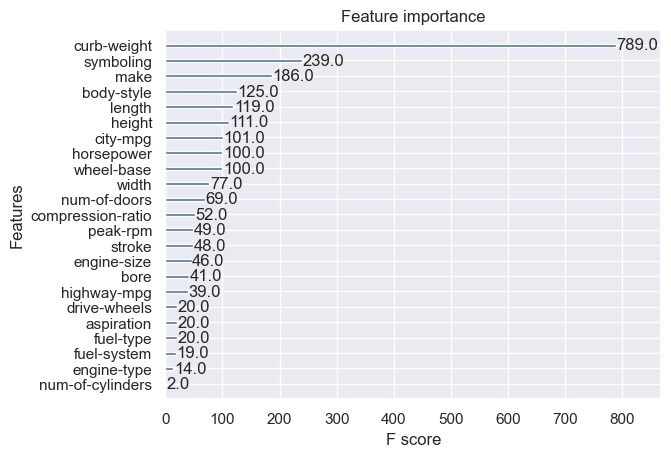

In [77]:
# Feature Selection 
 # conduct Feature Selection
# - Using XGBOOST to find feature importance

import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBRegressor()

x = df.drop('price', axis = 1)
y = df.price

model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [78]:
# We will select the features In order of the gradient booster feature importance 
selected_columns = ['make', 'symboling', 'curb-weight', 'body-style', 'length', 'city-mpg', 'horsepower', 'wheel-base', 'engine-size', 'engine-type', 'price']
training_data = df[selected_columns]
training_data

,make,symboling,curb-weight,body-style,length,city-mpg,horsepower,wheel-base,engine-size,engine-type,price
0,0,3,2548,0,168.8,21,5,88.6,130,0,13495
1,0,3,2548,0,168.8,21,5,88.6,130,0,16500
2,0,1,2823,2,171.2,19,20,94.5,152,4,16500
3,1,2,2337,3,176.6,24,2,99.8,109,2,13950
4,1,2,2824,3,176.6,18,8,99.4,136,2,17450
...,...,...,...,...,...,...,...,...,...,...,...
197,21,-1,3049,3,188.8,19,23,109.1,141,2,19045
198,21,-1,3012,3,188.8,18,13,109.1,173,4,21485
199,21,-1,3217,3,188.8,26,3,109.1,145,2,22470
200,21,-1,3062,3,188.8,19,7,109.1,141,2,22625


<h3><b>Modelling<hr></b></h3>

In [92]:
x = df.drop('price', axis = 1)
y = df.price

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8, random_state = 78)

In [96]:
# Here, we will try many algorithms, and compare their performances, and select the algorithm that produces the least

def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.tree import DecisionTreeRegressor
    from xgboost import XGBRegressor
    from sklearn.svm import SVC
    from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import r2_score

    # list of algorithms to be used
    algorithms = [RandomForestRegressor(), XGBRegressor(), DecisionTreeRegressor(), SVC(kernel = 'poly'), LinearRegression(), Ridge(alpha=10), Lasso(alpha = 10)]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(r2_score(model_validate, y_train))

        test_perf = model_name.predict(x_test)
        scores.append(r2_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]


table, model1, model2 = modeller(xtrain, ytrain, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
0,"(DecisionTreeRegressor(max_features=1.0, rando...",0.905422,0.988630
1,"XGBRegressor(base_score=None, booster=None, ca...",0.881732,0.998812
6,Lasso(alpha=10),0.857733,0.890306
4,LinearRegression(),0.849840,0.893170
2,DecisionTreeRegressor(),0.841717,0.998812
5,Ridge(alpha=10),0.774450,0.874561
3,SVC(kernel='poly'),-0.810467,0.522253


The RandomForest Algorithm performed the best 

In [80]:
# Based on the RandomForest Algorithm peformance, we make it our main algorithm for modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor()

rf_model.fit(xtrain, ytrain)

# Model Evaluation
cross_validation = rf_model.predict(xtrain) # Predict the training data
score = r2_score(cross_validation, ytrain).round(2) # Check the accuracy of the model

print(f'The Model is {(r2_score(cross_validation, ytrain).round(2)) * 100}% accurate')
if score > 0.75:
    print('Model did not underfit')
else:
    print('Model is underfitted')

The Model is 99.0% accurate
Model did not underfit


In [81]:
pred = rf_model.predict(xtest)
score = r2_score(pred, ytest).round(2) # Check the accuracy of the model

print(f'The Model is {score * 100}% accurate')
if score > 0.75:
    print('Model did not Overfit')
else:
    print('Model is Overfitted')

The Model is 92.0% accurate
Model did not Overfit


In [82]:
# Save model 
joblib.dump(rf_model, open('carPricePredictor.pkl', 'wb'))

In [97]:
# Checking for homoscedsticity of the model 
compare = pd.concat([pd.Series(ytest.reset_index(drop = True), name = 'Actual'), pd.Series(pred.astype(int), name = 'Predicted')], axis = 1)
compare.head()

,Actual,Predicted
0,16500,17589
1,8921,9793
2,15998,16937
3,5118,7102
4,17710,20075


Text(0.5, 1.0, 'Homoscedasticity Of The Model')

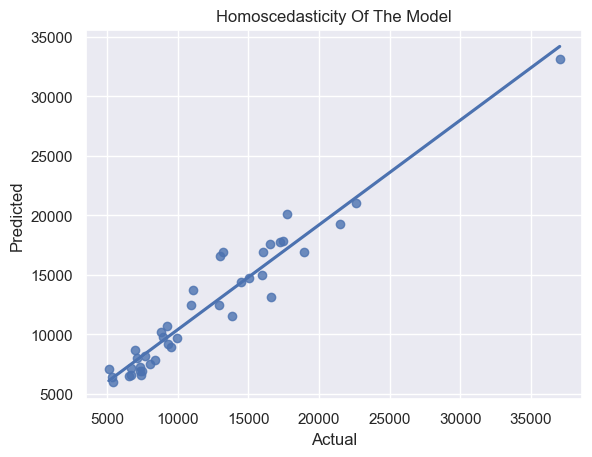

In [99]:
sns.regplot(x = compare['Actual'], y = compare['Predicted'], ci = 0)
plt.title('Homoscedasticity Of The Model')